In [25]:
import requests
import time
from requests.compat import urljoin
from bs4 import BeautifulSoup
from PIL import Image
import io
import shutil
import os

# Load all Images

In [40]:
dirname = "data"
ims = []
filenames = []
for filename in os.listdir(dirname) :
    filenames.append(filename.split(".")[0])
    fullname = os.path.join(dirname, filename)
    #print(fullname)
    im = Image.open(fullname)
    #display(im)
    ims.append(im)
print("images : " + str(len(ims)))

images : 283


# Split to single Digits 1/2/3/4

image size : (100, 40)


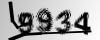

In [27]:
print("image size : " + str(ims[0].size))

rects = [(17,12,35,35),(37,10,53,33),(56,10,72,33),(76,12,92,35)]

def extract_digits( ims, rect ) :
    digits = []
    for im in ims:
        digits.append(im.copy().crop(rect))
    return digits

digit1 = extract_digits( ims, rects[0] )
digit2 = extract_digits( ims, rects[1] )
digit3 = extract_digits( ims, rects[2] )
digit4 = extract_digits( ims, rects[3] )

display( ims[-1] )
display( digit1[-1] )
display( digit2[-1] )
display( digit3[-1] )
display( digit4[-1] )


# Convert RGB -> Grey and make np-Array

In [28]:
import numpy as np

digit1[-1].getbands()

def make_np_greyscale( digit ) :
    np_digit = []
    for im in digit:
        np_digit.append( np.array(im.convert("L").getdata()) )
    return np_digit

np_digit1 = make_np_greyscale( digit1 )
np_digit2 = make_np_greyscale( digit2 )
np_digit3 = make_np_greyscale( digit3 )
np_digit4 = make_np_greyscale( digit4 )

# Cluster Images

In [55]:
from sklearn.cluster import KMeans

#20 clusters : 0...9 / "upware bent","downward bent"

def cluster_kmeans( np_digits, clusters ) :
    kmeans = KMeans(n_clusters=clusters,random_state=22)
    return kmeans.fit( np_digits )

kmeans1 = cluster_kmeans( np_digit1, 22 )

In [61]:
def display_imagelist( group_ims ) :
    l = len(group_ims)
    #print(g, l)
    width = group_ims[0].size[0]
    im_concat = Image.new("L", (width * l, group_ims[0].size[1]))
    offset=0
    for im in group_ims:
        im_concat.paste(im, (offset,0))
        offset += width
    display(im_concat)

def group_clusters( digits, labels, filenames, index ) :
    groups = {}
    filelabels = {}
    for im, cluster, filename in zip(digits, labels, filenames):
        if cluster not in groups.keys():
            groups[cluster] = []
            groups[cluster].append(im)
            filelabels[cluster] = []
            filelabels[cluster].append(filename)
        else:
            groups[cluster].append(im)
            filelabels[cluster].append(filename)
    # postprocess filelabels
    for key in filelabels.keys():
        flabels = []
        for lab in filelabels[key]:
            if len(lab) == 4 :
                flabels.append(lab[index])
        if len(flabels) == 0 :
            flabels.append(filelabels[key][0])
            flabels.append(filelabels[key][1])
            flabels.append(filelabels[key][2])
        print(flabels)
        display_imagelist(groups[key])
    return groups

def display_cluster( groups ) :
    for g in groups:
        group_ims = groups[g]
        display_imagelist( group_ims )
    print()

groups1 = group_clusters( digit1, kmeans1.labels_, filenames, 0 )
#display_cluster( groups1 )

kmeans1.predict( [np_digit1[-1]] )

['4', '4']


['sitc1_2022-01-06 21_54_03', 'sitc1_2022-01-06 21_53_49', 'sitc1_2022-01-06 22_55_19']


['5']


['7', '7']


['0', '8']


['sitc1_2022-01-06 22_55_20', 'sitc1_2022-01-06 21_53_47', 'sitc1_2022-01-06 22_55_22']


['0', '0', '0']


['3']


['sitc1_2022-01-06 22_55_24', 'sitc1_2022-01-06 21_53_57', 'sitc1_2022-01-06 21_54_05']


['6', '6', '6']


['5']


['2']


['9']


['3']


['2']


['0']


['sitc1_2022-01-06 21_53_49', 'sitc1_2022-01-07 16:25:52', 'sitc1_2022-01-07 16:25:41']


['6', '6']


['sitc1_2022-01-06 21_53_49', 'sitc1_2022-01-06 21_54_15', 'sitc1_2022-01-07 16:25:44']


['sitc1_2022-01-06 21_53_54', 'sitc1_2022-01-07 16:06:59', 'sitc1_2022-01-07 16:07:04']


['sitc1_2022-01-07 16:06:58', 'sitc1_2022-01-07 16:25:53', 'sitc1_2022-01-07 16:07:17']


['sitc1_2022-01-07 16:25:55', 'sitc1_2022-01-07 16:07:24', 'sitc1_2022-01-07 16:26:03']


array([19], dtype=int32)

# Show Clusters

In [30]:
kmeans2 = cluster_kmeans( np_digit2, 20 )
print(kmeans2)

kmeans3 = cluster_kmeans( np_digit3, 20 )
print(kmeans3)

kmeans4 = cluster_kmeans( np_digit4, 20 )
print(kmeans4)

groups2 = group_clusters( digit2, kmeans2.labels_ )
groups3 = group_clusters( digit3, kmeans3.labels_ )
groups4 = group_clusters( digit4, kmeans4.labels_ )

display_cluster( groups2 )
display_cluster( groups3 )
display_cluster( groups4 )